<a href="https://colab.research.google.com/github/thanga-v2/Transformers/blob/main/Zero_Shot_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With Regular classification, we train a model using a lebeled dataset.

Labels are dicrete categories.



In [ ]:
# BBC news dataset

!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-08-26 06:07:01--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.08MB/s    in 1.0s    

2024-08-26 06:07:03 (5.08 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import textwrap

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [ ]:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
classifier("Emirates is one of the safest countries for women to live in", candidate_labels=["positive", "negative"])

{'sequence': 'Emirates is one of the safest countries for women to live in',
 'labels': ['positive', 'negative'],
 'scores': [0.9851922392845154, 0.014807719737291336]}

In [ ]:
classifier("Emirates is not one of the safest countries for women to live in", candidate_labels=["positive", "negative"])

{'sequence': 'Emirates is not one of the safest countries for women to live in',
 'labels': ['negative', 'positive'],
 'scores': [0.995374858379364, 0.004625148605555296]}

In [ ]:
classifier("Berlin is the most beautiful cities I have ever visited", candidate_labels=["positive", "negative"])

{'sequence': 'Berlin is the most beautiful cities I have ever visited',
 'labels': ['positive', 'negative'],
 'scores': [0.9792693853378296, 0.02073061466217041]}

In [ ]:
classifier("Mumbai is very clumsy", candidate_labels=["positive", "negative"])

{'sequence': 'Mumbai is very clumsy',
 'labels': ['negative', 'positive'],
 'scores': [0.9871863126754761, 0.012813663110136986]}

In [ ]:
text = "Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions.[16] AMPK is regulated allosterically and by post-translational modification, which work together."

In [ ]:
classifier(text, candidate_labels=["biology", "math", "geology"])

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions.[16] AMPK is regulated allosterically and by post-translational modification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.895778238773346, 0.05948495864868164, 0.044736769050359726]}

In [ ]:
text = "Kohli's batting style and approach to the game have frequently drawn comparisons to the legendary Sachin Tendulkar, whom he regarded as the epitome of excellence in the sport of cricket. Dubbed as Tendulkar's successor, [20][21] he is widely considered to have the potential to surpass his records in the future.[22][23] His reverence for Tendulkar as a role model, whom he idolized in his formative years and sought to emulate, is well-documented."

In [ ]:
classifier(text, candidate_labels=["cricket", "basketball", "tennis", "football"])

{'sequence': "Kohli's batting style and approach to the game have frequently drawn comparisons to the legendary Sachin Tendulkar, whom he regarded as the epitome of excellence in the sport of cricket. Dubbed as Tendulkar's successor, [20][21] he is widely considered to have the potential to surpass his records in the future.[22][23] His reverence for Tendulkar as a role model, whom he idolized in his formative years and sought to emulate, is well-documented.",
 'labels': ['cricket', 'football', 'basketball', 'tennis'],
 'scores': [0.9975025653839111,
  0.0009183649672195315,
  0.0008734524017199874,
  0.0007055537425912917]}

In [ ]:
text = "Starting in 1968, Trump was employed at his father's real estate company, Trump Management, which owned racially segregated middle-class rental housing in New York City's outer boroughs.[50][51] In 1971, he became president of the company and began using the Trump Organization as an umbrella brand.[52] Between 1991 and 2009, he filed for Chapter 11 bankruptcy protection for six of his businesses: the Plaza Hotel in Manhattan, the casinos in Atlantic City, New Jersey, and the Trump Hotels & Casino Resorts company.[53]"

In [ ]:
classifier(text, candidate_labels = ["US elections", "Indian elections"])

{'sequence': "Starting in 1968, Trump was employed at his father's real estate company, Trump Management, which owned racially segregated middle-class rental housing in New York City's outer boroughs.[50][51] In 1971, he became president of the company and began using the Trump Organization as an umbrella brand.[52] Between 1991 and 2009, he filed for Chapter 11 bankruptcy protection for six of his businesses: the Plaza Hotel in Manhattan, the casinos in Atlantic City, New Jersey, and the Trump Hotels & Casino Resorts company.[53]",
 'labels': ['US elections', 'Indian elections'],
 'scores': [0.6337353587150574, 0.366264671087265]}

In [ ]:
classifier(text, candidate_labels = ["USA", "India"])

{'sequence': "Starting in 1968, Trump was employed at his father's real estate company, Trump Management, which owned racially segregated middle-class rental housing in New York City's outer boroughs.[50][51] In 1971, he became president of the company and began using the Trump Organization as an umbrella brand.[52] Between 1991 and 2009, he filed for Chapter 11 bankruptcy protection for six of his businesses: the Plaza Hotel in Manhattan, the casinos in Atlantic City, New Jersey, and the Trump Hotels & Casino Resorts company.[53]",
 'labels': ['USA', 'India'],
 'scores': [0.890038251876831, 0.10996170341968536]}

In [ ]:
data = pd.read_csv('bbc_text_cls.csv')

In [ ]:
len(data)

2225

In [ ]:
data.shape

(2225, 2)

In [ ]:
data.columns

Index(['text', 'labels'], dtype='object')

In [ ]:
data.head(20)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
5,Japan narrowly escapes recession\n\nJapan's ec...,business
6,Jobs growth still slow in the US\n\nThe US cre...,business
7,"India calls for fair trade rules\n\nIndia, whi...",business
8,Ethiopia's crop production up 24%\n\nEthiopia ...,business
9,Court rejects $280bn tobacco case\n\nA US gove...,business


In [ ]:
data.sample(frac=1).head()

,text,labels
300,Libya takes $1bn in unfrozen funds\n\nLibya ha...,business
265,Could Yukos be a blessing in disguise?\n\nOthe...,business
1736,Roddick into San Jose final\n\nAndy Roddick wi...,sport
1165,Defection timed to hit tax pledge\n\nWith impe...,politics
1907,Nintendo handheld given Euro date\n\nNintendo'...,tech


In [ ]:
data['labels']

,labels
0,business
1,business
2,business
3,business
4,business
...,...
2220,tech
2221,tech
2222,tech
2223,tech


In [ ]:


temp = set(data['labels'])
temp

{'business', 'entertainment', 'politics', 'sport', 'tech'}

The elements of a set are unique

In [ ]:
temp1 = list(set(data['labels']))
temp1

['tech', 'politics', 'business', 'entertainment', 'sport']

The below will return the list of all unique labels.

In [ ]:
labels = list(set(data['labels']))
labels

['tech', 'politics', 'business', 'entertainment', 'sport']

In [ ]:
data.iloc[1022]['text']

'Brown to outline presidency goals\n\nNext year will be "make or break" for development in poorer countries Gordon Brown will say as he sets out UK goals for its EU and G8 presidencies.\n\nThe chancellor is due to outline a series of key targets the government will be judged on in 2005. They will include doubling aid from donor countries and eliminating debt owed by the poorest nations. Mr Brown also wants other G8 nations to match his target for overseas aid - spending 0.7% of national income.\n\nHe also wants the richer countries to do more to help the development of vaccines for Aids and malaria. The chancellor is travelling to America next week as part of his persuasion drive over the issue. He told BBC Radio 4\'s Today programme: "We need more resources allied to progress on trade and progress on debt relief if we are going to make an impact on the problems of ill health, of illiteracy, of poverty, particularly in Africa but right through the developing countries."\n\nHis proposal

In [ ]:
textwrap.fill(data.iloc[1022]['text'])

'Brown to outline presidency goals  Next year will be "make or break"\nfor development in poorer countries Gordon Brown will say as he sets\nout UK goals for its EU and G8 presidencies.  The chancellor is due to\noutline a series of key targets the government will be judged on in\n2005. They will include doubling aid from donor countries and\neliminating debt owed by the poorest nations. Mr Brown also wants\nother G8 nations to match his target for overseas aid - spending 0.7%\nof national income.  He also wants the richer countries to do more to\nhelp the development of vaccines for Aids and malaria. The chancellor\nis travelling to America next week as part of his persuasion drive\nover the issue. He told BBC Radio 4\'s Today programme: "We need more\nresources allied to progress on trade and progress on debt relief if\nwe are going to make an impact on the problems of ill health, of\nilliteracy, of poverty, particularly in Africa but right through the\ndeveloping countries."  His pr

In [ ]:
print(textwrap.fill(data.iloc[1022]['text']))

Brown to outline presidency goals  Next year will be "make or break"
for development in poorer countries Gordon Brown will say as he sets
out UK goals for its EU and G8 presidencies.  The chancellor is due to
outline a series of key targets the government will be judged on in
2005. They will include doubling aid from donor countries and
eliminating debt owed by the poorest nations. Mr Brown also wants
other G8 nations to match his target for overseas aid - spending 0.7%
of national income.  He also wants the richer countries to do more to
help the development of vaccines for Aids and malaria. The chancellor
is travelling to America next week as part of his persuasion drive
over the issue. He told BBC Radio 4's Today programme: "We need more
resources allied to progress on trade and progress on debt relief if
we are going to make an impact on the problems of ill health, of
illiteracy, of poverty, particularly in Africa but right through the
developing countries."  His proposals were eff

In [ ]:
data.iloc[1022]['labels']

'politics'

In [ ]:
classifier(data.iloc[1022]['text'], candidate_labels = labels)

{'sequence': 'Brown to outline presidency goals\n\nNext year will be "make or break" for development in poorer countries Gordon Brown will say as he sets out UK goals for its EU and G8 presidencies.\n\nThe chancellor is due to outline a series of key targets the government will be judged on in 2005. They will include doubling aid from donor countries and eliminating debt owed by the poorest nations. Mr Brown also wants other G8 nations to match his target for overseas aid - spending 0.7% of national income.\n\nHe also wants the richer countries to do more to help the development of vaccines for Aids and malaria. The chancellor is travelling to America next week as part of his persuasion drive over the issue. He told BBC Radio 4\'s Today programme: "We need more resources allied to progress on trade and progress on debt relief if we are going to make an impact on the problems of ill health, of illiteracy, of poverty, particularly in Africa but right through the developing countries."\n\

In [ ]:
pred = classifier(data['text'].tolist(), candidate_labels=labels)

In [55]:
pred

[{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and w

In [ ]:
# re order the labels


In [67]:
[data['labels'] for data in pred]

[['business', 'tech', 'entertainment', 'politics', 'sport'],
 ['business', 'politics', 'entertainment', 'sport', 'tech'],
 ['politics', 'business', 'tech', 'sport', 'entertainment'],
 ['business', 'tech', 'entertainment', 'politics', 'sport'],
 ['business', 'entertainment', 'politics', 'sport', 'tech'],
 ['business', 'tech', 'politics', 'sport', 'entertainment'],
 ['politics', 'business', 'sport', 'entertainment', 'tech'],
 ['business', 'politics', 'entertainment', 'tech', 'sport'],
 ['tech', 'business', 'politics', 'entertainment', 'sport'],
 ['business', 'politics', 'tech', 'sport', 'entertainment'],
 ['business', 'tech', 'sport', 'entertainment', 'politics'],
 ['politics', 'business', 'tech', 'entertainment', 'sport'],
 ['business', 'sport', 'tech', 'politics', 'entertainment'],
 ['business', 'tech', 'entertainment', 'politics', 'sport'],
 ['tech', 'entertainment', 'business', 'sport', 'politics'],
 ['business', 'entertainment', 'politics', 'sport', 'tech'],
 ['business', 'tech', 'e

In [69]:
# this retrieves the Index with top score

 [data['labels'][0] for data in pred]

['business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'tech',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'tech',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'tech',
 'business',
 'sport',
 'business',
 'business',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'tech',
 'politics',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'politics',
 'politics',
 'politics',
 'business',
 'politics'

In [72]:
pred[10:100]

[{'sequence': "Ask Jeeves tips online ad revival\n\nAsk Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.\n\nThe firm's revenue nearly tripled in the fourth quarter of 2004, exceeding $86m (£46m). Ask Jeeves, once among the best-known names on the web, is now a relatively modest player. Its $17m profit for the quarter was dwarfed by the $204m announced by rival Google earlier in the week. During the same quarter, Yahoo earned $187m, again tipping a resurgence in online advertising.\n\nThe trend has taken hold relatively quickly. Late last year, marketing company Doubleclick, one of the leading providers of online advertising, warned that some or all of its business would have to be put up for sale. But on Thursday, it announced that a sharp turnaround had brought about an unexpected increase in profits. Neither Ask Jeeves nor Doubleclick thrilled investors with their profit news, however. In both cases, t

**The below will retriev / return the label with the top score.**

i.e lets say a context is about **tech**,

the below code returns tech as the top score.

['tech', 'business' ....... and so]

if the context is about **sport**,

this will retrieves
['sport', 'tech', .......]

**The first element in the label is always the top score.**


In [73]:
# label with the top score.

predicted_labels = [ data['labels'][0] for data in pred]
predicted_labels

['business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'tech',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'tech',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'tech',
 'business',
 'sport',
 'business',
 'business',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'tech',
 'politics',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'politics',
 'politics',
 'politics',
 'business',
 'politics'

In [75]:
data.iloc[10]

,10
text,Ask Jeeves tips online ad revival\n\nAsk Jeeve...
labels,business


In [76]:
data['predicted_labels'] = predicted_labels

In [78]:
data.iloc[10]

,10
text,Ask Jeeves tips online ad revival\n\nAsk Jeeve...
labels,business
predicted_labels,business


In [81]:
# compute the accuracy

test = data[data['labels'] == data['predicted_labels']]
test.shape

(1257, 3)

In [84]:
data.shape

(2225, 3)

In [91]:



# Computing the accuracy


data[data['labels'] == data['predicted_labels']]
print("accuracy :",np.mean(data['labels'] == data['predicted_labels']))

accuracy : 0.5649438202247191


**Computing Matrix of Probabilites.**

Convert prediction probs into an NxK matrix according to original label order.

N - length(data) - 2225 rows

K - len(labels) - 5

In [104]:
N = len(data)
K = len(labels)

In [107]:
for i,j in enumerate(labels):
  print(i)

0
1
2
3
4


In [108]:
for i,j in enumerate(labels):
  print(j)

tech
politics
business
entertainment
sport


In [111]:
{i:j for i,j in enumerate(labels)}

{0: 'tech', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'sport'}

In [112]:
label2index = {j:i for i,j in enumerate(labels)}
label2index

{'tech': 0, 'politics': 1, 'business': 2, 'entertainment': 3, 'sport': 4}

In [115]:
# Instantiate probability matrix

probs = np.zeros((N,K))


In [116]:
pred[100]

{'sequence': 'Australia rates at four year high\n\nAustralia is raising its benchmark interest rate to its highest level in four years despite signs of a slowdown in the country\'s economy.\n\nThe Reserve Bank of Australia lifted interest rates 0.25% to 5.5%, their first upwards move in more than a year. However, shortly after the Bank made its decision, new figures showed a fall in economic growth in the last quarter. The Bank said it had acted to curb inflation but the move was criticised by some analysts.\n\nThe rate hike was the first since December 2003 and had been well-flagged in advance. However, opposition parties and some analysts said the move was ill-timed given data showing the Australian economy grew just 0.1% between October and December and 1.5% on an annual basis.\n\nThe figures, representing a decline from the 0.2% growth in GDP seen between July and September, were below market expectations. Consumer spending remains strong, however, and the Bank is concerned about g

In [117]:
pred[101]

{'sequence': 'US company admits Benin bribery\n\nA US defence and telecommunications company has agreed to pay $28.5m after admitting bribery in the West African state of Benin.\n\nThe Titan corporation was accused of funnelling more than $2m into the 2001 re-election campaign of President Mathieu Kerekou. At the time, Titan was trying to get a higher price for a telecommunications project in Benin. There is no suggestion that Mr Kerekou was himself aware of any wrongdoing. Titan, a California-based company, pleaded guilty to falsifying its accounts and violating US anti-bribery laws. It agreed to pay $13m in criminal penalties, as well as $15.5m to settle a civil lawsuit brought by the US financial watchdog, the Securities and Exchange Commission (SEC).\n\nThe SEC had accused Titan of illegally paying $2.1m to an unnamed agent in Benin claiming ties with President Kerekou. Some of the money was used to pay for T-shirts with campaign slogans on them ahead of the 2001 election. Shortly 

In [126]:
for i in range(N):
  # loop through labels and scores in corresponding order
  d = pred[i]
   # zip helps us to loop through concurrently first labels and then scores.
  for label,score in zip(d['labels'], d['scores']):
      k = label2index[label] # column of our matrix
      probs[i, k] = score



If we want to calculate AUC and Confusion matrix, we need the labels in integers.



In [131]:
int_labels = [label2index[i] for i in data['labels']]

Now,

lets


Compute the Confusion Matrix






In [135]:
int_preds = np.argmax(probs, axis=1)
cm = confusion_matrix(int_labels, int_preds, normalize='true')

Now,


Lets plot the confusion matrix



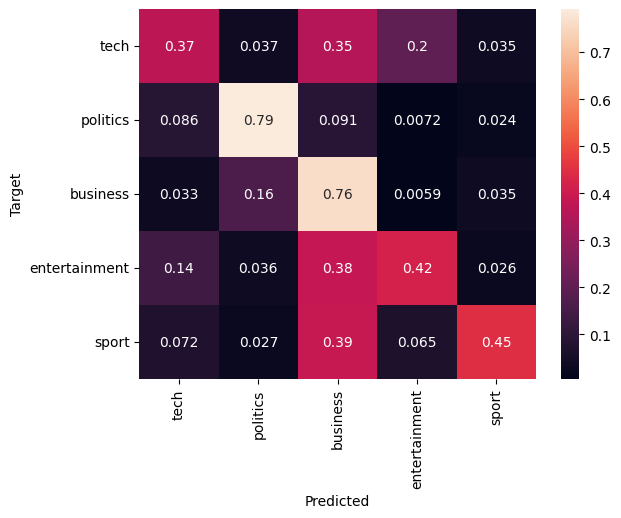

In [136]:
def plot_confusion_matrix(cm):
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  ax = sn.heatmap(df_cm, annot=True, fmt='.2g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_confusion_matrix(cm)

Calculating the F1 score

In [139]:
for i in pred:
  print(i['scores'])
  print(i['labels'])

[0.5125005841255188, 0.18689699470996857, 0.16224142909049988, 0.07622876763343811, 0.06213219836354256]
['business', 'tech', 'entertainment', 'politics', 'sport']
[0.4314546287059784, 0.21031464636325836, 0.12214246392250061, 0.12084168195724487, 0.11524662375450134]
['business', 'politics', 'entertainment', 'sport', 'tech']
[0.3765963017940521, 0.3585819900035858, 0.15931840240955353, 0.0578555129468441, 0.04764775186777115]
['politics', 'business', 'tech', 'sport', 'entertainment']
[0.6941231489181519, 0.11751926690340042, 0.07253795862197876, 0.05838155373930931, 0.05743803456425667]
['business', 'tech', 'entertainment', 'politics', 'sport']
[0.5903329849243164, 0.11178237199783325, 0.10705946385860443, 0.10538599640130997, 0.08543922752141953]
['business', 'entertainment', 'politics', 'sport', 'tech']
[0.39057281613349915, 0.20467977225780487, 0.15493230521678925, 0.1303006112575531, 0.11951447278261185]
['business', 'tech', 'politics', 'sport', 'entertainment']
[0.426050096750259

In [141]:
# x - data['labels']
# y - predicted_labels

f1_score(data['labels'], predicted_labels, average="micro")

0.5649438202247191

ROC AUC score

roc_auc_score(int_labels, probs, multi_class='ovo')

In [142]:
roc_auc_score(int_labels, probs, multi_class='ovo')

0.8853265673046306